In [1]:
#  imports 
import numpy as np
import pandas as pd
from math import sqrt 
from pprint import pprint
from numpy import array
from time import time

In [2]:
# load data

df=pd.read_csv('Wilt_withoutdupl_norm_05.csv')  

del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)

df.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan,outlier
0,0.656711,0.050984,0.044570,0.218476,0.132110,1
1,0.680591,0.049425,0.041939,0.177275,0.106749,1
2,0.734892,0.047396,0.042926,0.259034,0.143741,1
3,0.698087,0.035317,0.027066,0.127065,0.095697,1
4,0.738927,0.046076,0.040228,0.295501,0.112481,1


In [3]:
# df to values
df = df.values

In [4]:
#   CascadeExtratTrees
import argparse
import numpy as np
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/Wilt.json")  
gc = GCForest(config)

In [5]:
# train test
from sklearn.cross_validation import train_test_split
y = df[:,5]
X = df[:,0:5]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# count class
len(np.unique(y_train))

2

In [7]:
  # X_enc is the concatenated predict_proba result of CascadeExtratTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
  

[ 2018-07-31 01:33:33,527][cascade_classifier.fit_transform] X_groups_train.shape=[(3373, 5)],y_train.shape=(3373,),X_groups_test.shape=[(1446, 5)],y_test.shape=(1446,)
[ 2018-07-31 01:33:33,529][cascade_classifier.fit_transform] group_dims=[5]
[ 2018-07-31 01:33:33,530][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:33,531][cascade_classifier.fit_transform] group_ends=[5]
[ 2018-07-31 01:33:33,533][cascade_classifier.fit_transform] X_train.shape=(3373, 5),X_test.shape=(1446, 5)
[ 2018-07-31 01:33:33,535][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 5), X_cur_test.shape=(1446, 5)
[ 2018-07-31 01:33:34,242][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.82%
[ 2018-07-31 01:33:35,125][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:33:36,019][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fold

In [8]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:33:42,710][cascade_classifier.transform] X_groups_test.shape=[(1446, 5)]
[ 2018-07-31 01:33:42,711][cascade_classifier.transform] group_dims=[5]
[ 2018-07-31 01:33:42,713][cascade_classifier.transform] X_test.shape=(1446, 5)
[ 2018-07-31 01:33:42,715][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 5)


Test Accuracy of CascadeExtraTrees = 97.579530 %
[[1362    3]
 [  32   49]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1365
        1.0       0.94      0.60      0.74        81

avg / total       0.98      0.98      0.97      1446



In [9]:
#  predict_proba + Data 
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-31 01:33:45,087][cascade_classifier.transform] X_groups_test.shape=[(1446, 5)]
[ 2018-07-31 01:33:45,089][cascade_classifier.transform] group_dims=[5]
[ 2018-07-31 01:33:45,091][cascade_classifier.transform] X_test.shape=(1446, 5)
[ 2018-07-31 01:33:45,092][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 5)


In [10]:
# New data
X_train_new = X_train_enc
X_test_new  = X_test_enc

In [11]:
X_test_new.shape

(1446, 7)

In [12]:
X_train_new.shape

(3373, 7)

In [13]:
# Cascade ExtraTrees
config = load_json("./examples/Wiltgc.json")  
gc = GCForest(config)

X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-31 01:33:47,520][cascade_classifier.fit_transform] X_groups_train.shape=[(3373, 7)],y_train.shape=(3373,),X_groups_test.shape=[(1446, 7)],y_test.shape=(1446,)
[ 2018-07-31 01:33:47,521][cascade_classifier.fit_transform] group_dims=[7]
[ 2018-07-31 01:33:47,522][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:33:47,524][cascade_classifier.fit_transform] group_ends=[7]
[ 2018-07-31 01:33:47,525][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:33:47,526][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)
[ 2018-07-31 01:33:48,190][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.41%
[ 2018-07-31 01:33:49,164][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:33:50,068][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fold

In [14]:
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-31 01:34:24,174][cascade_classifier.transform] X_groups_test.shape=[(1446, 7)]
[ 2018-07-31 01:34:24,176][cascade_classifier.transform] group_dims=[7]
[ 2018-07-31 01:34:24,178][cascade_classifier.transform] X_test.shape=(1446, 7)
[ 2018-07-31 01:34:24,180][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 7)


Test Accuracy of CascadeExtraTrees = 98.132780 %
[[1355   10]
 [  17   64]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.86      0.79      0.83        81

avg / total       0.98      0.98      0.98      1446



In [15]:
# CascadeExtraTrees
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of CascadeExtraTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))   
    
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    
    config = load_json("./examples/Wiltgc.json")  
    gc = GCForest(config)
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) 
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")

[ 2018-07-31 01:34:26,591][cascade_classifier.fit_transform] X_groups_train.shape=[(3373, 7)],y_train.shape=(3373,),X_groups_test.shape=[(1446, 7)],y_test.shape=(1446,)
[ 2018-07-31 01:34:26,592][cascade_classifier.fit_transform] group_dims=[7]
[ 2018-07-31 01:34:26,594][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:34:26,595][cascade_classifier.fit_transform] group_ends=[7]
[ 2018-07-31 01:34:26,596][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:34:26,597][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)
[ 2018-07-31 01:34:27,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=99.41%
[ 2018-07-31 01:34:28,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:34:29,075][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_fold

[ 2018-07-31 01:35:03,143][cascade_classifier.transform] group_dims=[7]
[ 2018-07-31 01:35:03,145][cascade_classifier.transform] X_test.shape=(1446, 7)
[ 2018-07-31 01:35:03,146][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 7)
[ 2018-07-31 01:35:05,546][cascade_classifier.fit_transform] X_groups_train.shape=[(3373, 7)],y_train.shape=(3373,),X_groups_test.shape=[(1446, 7)],y_test.shape=(1446,)
[ 2018-07-31 01:35:05,548][cascade_classifier.fit_transform] group_dims=[7]
[ 2018-07-31 01:35:05,550][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-31 01:35:05,552][cascade_classifier.fit_transform] group_ends=[7]
[ 2018-07-31 01:35:05,553][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:35:05,554][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)


('Test Accuracy of CascadeExtraTrees = 98.271093 %', 'Layer :', 0)
[[1357    8]
 [  17   64]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.89      0.79      0.84        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '36.554', ' seconds')


[ 2018-07-31 01:35:06,212][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.82%
[ 2018-07-31 01:35:07,115][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:35:08,044][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.11%
[ 2018-07-31 01:35:08,967][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.52%
[ 2018-07-31 01:35:09,887][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.82%
[ 2018-07-31 01:35:10,805][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:35:11,682][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.81%
[ 2018-07-31 01:35:12,541][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:35:44,085][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:35:44,087][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)


('Test Accuracy of CascadeExtraTrees = 98.340249 %', 'Layer :', 1)
[[1359    6]
 [  18   63]]


             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1365
        1.0       0.91      0.78      0.84        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '36.108', ' seconds')


[ 2018-07-31 01:35:44,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.82%
[ 2018-07-31 01:35:45,767][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:35:46,785][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.11%
[ 2018-07-31 01:35:47,627][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.82%
[ 2018-07-31 01:35:48,715][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.82%
[ 2018-07-31 01:35:49,690][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.11%
[ 2018-07-31 01:35:50,558][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:35:51,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:36:22,749][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:36:22,750][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)


('Test Accuracy of CascadeExtraTrees = 98.063624 %', 'Layer :', 2)
[[1355   10]
 [  18   63]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.86      0.78      0.82        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '36.276', ' seconds')


[ 2018-07-31 01:36:23,445][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:36:24,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.52%
[ 2018-07-31 01:36:25,230][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.82%
[ 2018-07-31 01:36:26,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.52%
[ 2018-07-31 01:36:27,028][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.22%
[ 2018-07-31 01:36:27,910][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:36:28,791][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.22%
[ 2018-07-31 01:36:29,692][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.51%


[ 2018-07-31 01:37:04,901][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:37:05,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.73%
[ 2018-07-31 01:37:06,722][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:37:07,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.21%
[ 2018-07-31 01:37:07,831][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.43%
[ 2018-07-31 01:37:07,832][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.13%
[ 2018-07-31 01:37:07,833][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.43%
[ 2018-07-31 01:37:07,834][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.13%
[ 2018-07-31 01:37:07,835][

('Test Accuracy of CascadeExtraTrees = 98.063624 %', 'Layer :', 3)
[[1356    9]
 [  19   62]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.87      0.77      0.82        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '53.954', ' seconds')


[ 2018-07-31 01:37:24,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:37:25,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:37:26,680][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.22%
[ 2018-07-31 01:37:27,593][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:37:28,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.52%
[ 2018-07-31 01:37:29,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:37:30,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:37:31,203][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.81%


[ 2018-07-31 01:38:06,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.41%
[ 2018-07-31 01:38:07,811][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.62%
[ 2018-07-31 01:38:08,782][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:38:09,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.92%
[ 2018-07-31 01:38:09,976][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.49%
[ 2018-07-31 01:38:09,977][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=98.13%
[ 2018-07-31 01:38:09,981][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.49%
[ 2018-07-31 01:38:09,982][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=98.13%
[ 2018-07-31 01:38:09,983][

('Test Accuracy of CascadeExtraTrees = 97.925311 %', 'Layer :', 4)
[[1355   10]
 [  20   61]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.86      0.75      0.80        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '46.286', ' seconds')


[ 2018-07-31 01:38:15,450][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:38:16,351][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.22%
[ 2018-07-31 01:38:17,222][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.82%
[ 2018-07-31 01:38:18,152][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:38:19,061][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:38:19,962][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:38:20,861][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:38:21,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


[ 2018-07-31 01:38:57,195][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.41%
[ 2018-07-31 01:38:58,082][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=96.43%
[ 2018-07-31 01:38:58,952][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:38:59,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.92%
[ 2018-07-31 01:39:00,088][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.46%
[ 2018-07-31 01:39:00,089][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.79%
[ 2018-07-31 01:39:00,091][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.46%
[ 2018-07-31 01:39:00,092][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.79%
[ 2018-07-31 01:39:00,094][

[ 2018-07-31 01:39:36,235][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.55%
[ 2018-07-31 01:39:36,237][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=98.06%
[ 2018-07-31 01:39:36,238][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=98.64%, accuracy_test=98.06%
[ 2018-07-31 01:39:36,245][cascade_classifier.transform] X_groups_test.shape=[(1446, 7)]
[ 2018-07-31 01:39:36,246][cascade_classifier.transform] group_dims=[7]
[ 2018-07-31 01:39:36,247][cascade_classifier.transform] X_test.shape=(1446, 7)
[ 2018-07-31 01:39:36,248][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 7)
[ 2018-07-31 01:39:38,574][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(1446, 9)
[ 2018-07-31 01:39:40,941][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(1446, 9)
[ 2018-07-31 01:39:43,264][cascade_classifier.

('Test Accuracy of CascadeExtraTrees = 98.063624 %', 'Layer :', 5)
[[1354   11]
 [  17   64]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.85      0.79      0.82        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '81.469', ' seconds')


[ 2018-07-31 01:39:50,959][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:39:51,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-31 01:39:52,776][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.82%
[ 2018-07-31 01:39:53,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:39:54,556][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.52%
[ 2018-07-31 01:39:55,439][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:39:56,322][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.22%
[ 2018-07-31 01:39:57,193][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


[ 2018-07-31 01:40:33,946][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.11%
[ 2018-07-31 01:40:34,860][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.32%
[ 2018-07-31 01:40:35,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:40:36,681][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.92%
[ 2018-07-31 01:40:36,924][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.46%
[ 2018-07-31 01:40:36,926][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.79%
[ 2018-07-31 01:40:36,928][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.46%
[ 2018-07-31 01:40:36,929][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.79%
[ 2018-07-31 01:40:36,930][

('Test Accuracy of CascadeExtraTrees = 97.925311 %', 'Layer :', 6)
[[1353   12]
 [  18   63]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.84      0.78      0.81        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '64.868', ' seconds')


[ 2018-07-31 01:41:05,344][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:41:06,286][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.34%
[ 2018-07-31 01:41:07,196][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.41%
[ 2018-07-31 01:41:08,075][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.52%
[ 2018-07-31 01:41:08,930][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:41:09,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.70%
[ 2018-07-31 01:41:10,784][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:41:11,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:41:47,209][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.11%
[ 2018-07-31 01:41:48,213][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.02%
[ 2018-07-31 01:41:49,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.21%
[ 2018-07-31 01:41:50,145][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.51%
[ 2018-07-31 01:41:50,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.46%
[ 2018-07-31 01:41:50,375][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.86%
[ 2018-07-31 01:41:50,376][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.46%
[ 2018-07-31 01:41:50,377][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.86%
[ 2018-07-31 01:41:50,378][

('Test Accuracy of CascadeExtraTrees = 97.994467 %', 'Layer :', 7)
[[1354   11]
 [  18   63]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.85      0.78      0.81        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '45.775', ' seconds')


[ 2018-07-31 01:41:55,863][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:41:56,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.34%
[ 2018-07-31 01:41:57,740][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.52%
[ 2018-07-31 01:41:58,705][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:41:59,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.22%
[ 2018-07-31 01:42:00,581][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.82%
[ 2018-07-31 01:42:01,469][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-31 01:42:02,338][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


[ 2018-07-31 01:42:37,420][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.81%
[ 2018-07-31 01:42:38,304][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.02%
[ 2018-07-31 01:42:39,216][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:42:40,122][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.62%
[ 2018-07-31 01:42:40,366][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.37%
[ 2018-07-31 01:42:40,368][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.86%
[ 2018-07-31 01:42:40,370][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.37%
[ 2018-07-31 01:42:40,372][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.86%
[ 2018-07-31 01:42:40,373][

('Test Accuracy of CascadeExtraTrees = 97.717842 %', 'Layer :', 8)
[[1351   14]
 [  19   62]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.82      0.77      0.79        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '63.293', ' seconds')


[ 2018-07-31 01:43:08,577][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:43:09,468][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.63%
[ 2018-07-31 01:43:10,344][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.70%
[ 2018-07-31 01:43:11,223][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:43:12,144][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.63%
[ 2018-07-31 01:43:13,036][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.82%
[ 2018-07-31 01:43:13,915][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-31 01:43:14,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:43:51,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.81%
[ 2018-07-31 01:43:52,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.02%
[ 2018-07-31 01:43:53,232][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:43:54,117][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.21%
[ 2018-07-31 01:43:54,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.37%
[ 2018-07-31 01:43:54,364][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.86%
[ 2018-07-31 01:43:54,366][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.37%
[ 2018-07-31 01:43:54,367][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.86%
[ 2018-07-31 01:43:54,368][

[ 2018-07-31 01:44:30,592][cascade_classifier.calc_accuracy] Accuracy(layer_8 - train.classifier_average)=98.55%
[ 2018-07-31 01:44:30,593][cascade_classifier.calc_accuracy] Accuracy(layer_8 - test.classifier_average)=97.99%
[ 2018-07-31 01:44:30,594][cascade_classifier.fit_transform] [Result][Optimal Level Detected] opt_layer_num=6, accuracy_train=98.61%, accuracy_test=97.93%
[ 2018-07-31 01:44:30,600][cascade_classifier.transform] X_groups_test.shape=[(1446, 7)]
[ 2018-07-31 01:44:30,601][cascade_classifier.transform] group_dims=[7]
[ 2018-07-31 01:44:30,602][cascade_classifier.transform] X_test.shape=(1446, 7)
[ 2018-07-31 01:44:30,602][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1446, 7)
[ 2018-07-31 01:44:32,973][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(1446, 9)
[ 2018-07-31 01:44:35,307][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(1446, 9)
[ 2018-07-31 01:44:37,684][cascade_classifier.

('Test Accuracy of CascadeExtraTrees = 97.925311 %', 'Layer :', 9)
[[1353   12]
 [  18   63]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.84      0.78      0.81        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '82.726', ' seconds')


[ 2018-07-31 01:44:45,564][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:44:46,359][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:44:47,257][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.41%
[ 2018-07-31 01:44:48,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.52%
[ 2018-07-31 01:44:49,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.63%
[ 2018-07-31 01:44:50,100][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.82%
[ 2018-07-31 01:44:51,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-31 01:44:51,901][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.51%


[ 2018-07-31 01:45:27,604][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.41%
[ 2018-07-31 01:45:28,506][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.21%
[ 2018-07-31 01:45:29,420][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:45:30,313][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.21%
[ 2018-07-31 01:45:30,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.70%
[ 2018-07-31 01:45:30,556][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.79%
[ 2018-07-31 01:45:30,557][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.70%
[ 2018-07-31 01:45:30,558][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.79%
[ 2018-07-31 01:45:30,559][

('Test Accuracy of CascadeExtraTrees = 97.786999 %', 'Layer :', 10)
[[1352   13]
 [  19   62]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.83      0.77      0.79        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '75.177', ' seconds')


[ 2018-07-31 01:46:12,367][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:46:13,268][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.34%
[ 2018-07-31 01:46:14,163][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=99.11%
[ 2018-07-31 01:46:15,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:46:15,950][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.63%
[ 2018-07-31 01:46:16,852][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.82%
[ 2018-07-31 01:46:17,738][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.33%
[ 2018-07-31 01:46:18,656][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:46:57,818][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=99.11%
[ 2018-07-31 01:46:58,676][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.62%
[ 2018-07-31 01:46:59,593][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:47:00,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.51%
[ 2018-07-31 01:47:00,721][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.43%
[ 2018-07-31 01:47:00,722][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.93%
[ 2018-07-31 01:47:00,727][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.43%
[ 2018-07-31 01:47:00,728][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.93%
[ 2018-07-31 01:47:00,730][

('Test Accuracy of CascadeExtraTrees = 97.856155 %', 'Layer :', 11)
[[1357    8]
 [  23   58]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.88      0.72      0.79        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '67.709', ' seconds')


[ 2018-07-31 01:47:29,691][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.82%
[ 2018-07-31 01:47:30,603][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:47:31,490][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.52%
[ 2018-07-31 01:47:32,380][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.22%
[ 2018-07-31 01:47:33,292][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.63%
[ 2018-07-31 01:47:34,183][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.11%
[ 2018-07-31 01:47:35,063][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.03%
[ 2018-07-31 01:47:35,954][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:48:12,969][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.81%
[ 2018-07-31 01:48:13,831][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-31 01:48:14,727][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:48:15,635][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.62%
[ 2018-07-31 01:48:15,871][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.25%
[ 2018-07-31 01:48:15,873][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.93%
[ 2018-07-31 01:48:15,874][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.25%
[ 2018-07-31 01:48:15,875][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.93%
[ 2018-07-31 01:48:15,876][

('Test Accuracy of CascadeExtraTrees = 97.925311 %', 'Layer :', 12)
[[1356    9]
 [  21   60]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.87      0.74      0.80        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '46.926', ' seconds')


[ 2018-07-31 01:48:21,255][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:48:22,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.52%
[ 2018-07-31 01:48:22,986][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.52%
[ 2018-07-31 01:48:23,873][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:48:24,765][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:48:25,635][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.82%
[ 2018-07-31 01:48:26,512][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:48:27,365][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.51%


[ 2018-07-31 01:48:58,356][cascade_classifier.fit_transform] X_train.shape=(3373, 7),X_test.shape=(1446, 7)
[ 2018-07-31 01:48:58,357][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(3373, 7), X_cur_test.shape=(1446, 7)


('Test Accuracy of CascadeExtraTrees = 97.717842 %', 'Layer :', 13)
[[1353   12]
 [  21   60]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.83      0.74      0.78        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '35.402', ' seconds')


[ 2018-07-31 01:48:59,093][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:49:00,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:49:00,889][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.82%
[ 2018-07-31 01:49:01,761][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:49:02,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.63%
[ 2018-07-31 01:49:03,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:49:04,441][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:49:05,307][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.51%


[ 2018-07-31 01:49:40,651][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-31 01:49:41,576][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.02%
[ 2018-07-31 01:49:42,461][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.21%
[ 2018-07-31 01:49:43,460][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.92%
[ 2018-07-31 01:49:43,690][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.07%
[ 2018-07-31 01:49:43,692][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.86%
[ 2018-07-31 01:49:43,693][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.07%
[ 2018-07-31 01:49:43,694][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.86%
[ 2018-07-31 01:49:43,696][

('Test Accuracy of CascadeExtraTrees = 97.648686 %', 'Layer :', 14)
[[1358    7]
 [  27   54]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.89      0.67      0.76        81

avg / total       0.98      0.98      0.97      1446

(' Time ', '54.472', ' seconds')


[ 2018-07-31 01:50:00,329][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:50:01,186][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.22%
[ 2018-07-31 01:50:02,046][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.22%
[ 2018-07-31 01:50:02,899][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:50:03,752][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.82%
[ 2018-07-31 01:50:04,606][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.41%
[ 2018-07-31 01:50:05,622][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:50:06,466][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.81%


[ 2018-07-31 01:50:40,470][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.33%
[ 2018-07-31 01:50:41,497][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-31 01:50:42,731][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:50:43,915][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.62%
[ 2018-07-31 01:50:44,158][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.25%
[ 2018-07-31 01:50:44,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.72%
[ 2018-07-31 01:50:44,162][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.25%
[ 2018-07-31 01:50:44,164][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.72%
[ 2018-07-31 01:50:44,166][

('Test Accuracy of CascadeExtraTrees = 97.717842 %', 'Layer :', 15)
[[1355   10]
 [  23   58]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.85      0.72      0.78        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '44.491', ' seconds')


[ 2018-07-31 01:50:49,595][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.22%
[ 2018-07-31 01:50:50,330][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:50:51,254][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.82%
[ 2018-07-31 01:50:52,132][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:50:53,010][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=97.93%
[ 2018-07-31 01:50:53,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.52%
[ 2018-07-31 01:50:54,790][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:50:55,699][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:51:30,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=97.33%
[ 2018-07-31 01:51:31,062][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-31 01:51:31,956][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.51%
[ 2018-07-31 01:51:32,800][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.62%
[ 2018-07-31 01:51:33,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.04%
[ 2018-07-31 01:51:33,022][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.65%
[ 2018-07-31 01:51:33,023][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.04%
[ 2018-07-31 01:51:33,023][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.65%
[ 2018-07-31 01:51:33,024][

('Test Accuracy of CascadeExtraTrees = 97.717842 %', 'Layer :', 16)
[[1357    8]
 [  25   56]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.88      0.69      0.77        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '62.196', ' seconds')


[ 2018-07-31 01:52:01,141][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.63%
[ 2018-07-31 01:52:02,090][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.93%
[ 2018-07-31 01:52:03,024][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.22%
[ 2018-07-31 01:52:03,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.63%
[ 2018-07-31 01:52:04,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.22%
[ 2018-07-31 01:52:05,637][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=99.11%
[ 2018-07-31 01:52:06,379][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=98.22%
[ 2018-07-31 01:52:07,246][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.62%


[ 2018-07-31 01:52:42,373][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:52:43,723][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=97.92%
[ 2018-07-31 01:52:44,599][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:52:45,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.81%
[ 2018-07-31 01:52:45,584][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.40%
[ 2018-07-31 01:52:45,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.51%
[ 2018-07-31 01:52:45,587][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.40%
[ 2018-07-31 01:52:45,588][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.51%
[ 2018-07-31 01:52:45,589][

('Test Accuracy of CascadeExtraTrees = 97.510373 %', 'Layer :', 17)
[[1353   12]
 [  24   57]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.83      0.70      0.76        81

avg / total       0.97      0.98      0.97      1446

(' Time ', '53.981', ' seconds')


[ 2018-07-31 01:53:01,793][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.34%
[ 2018-07-31 01:53:02,650][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.52%
[ 2018-07-31 01:53:03,531][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.52%
[ 2018-07-31 01:53:04,384][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.52%
[ 2018-07-31 01:53:05,236][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=99.11%
[ 2018-07-31 01:53:05,959][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.22%
[ 2018-07-31 01:53:06,807][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.92%
[ 2018-07-31 01:53:07,662][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=98.21%


[ 2018-07-31 01:53:37,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:53:38,407][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.21%
[ 2018-07-31 01:53:39,012][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.21%
[ 2018-07-31 01:53:39,727][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=97.92%
[ 2018-07-31 01:53:39,947][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.22%
[ 2018-07-31 01:53:39,948][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.86%
[ 2018-07-31 01:53:39,949][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.22%
[ 2018-07-31 01:53:39,950][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.86%
[ 2018-07-31 01:53:39,951][

('Test Accuracy of CascadeExtraTrees = 97.925311 %', 'Layer :', 18)
[[1355   10]
 [  20   61]]


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1365
        1.0       0.86      0.75      0.80        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '38.801', ' seconds')


[ 2018-07-31 01:53:43,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=98.52%
[ 2018-07-31 01:53:43,864][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.82%
[ 2018-07-31 01:53:44,585][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.52%
[ 2018-07-31 01:53:45,313][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.93%
[ 2018-07-31 01:53:46,165][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.82%
[ 2018-07-31 01:53:47,004][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.52%
[ 2018-07-31 01:53:47,742][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.63%
[ 2018-07-31 01:53:48,607][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.92%


[ 2018-07-31 01:54:14,980][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=98.52%
[ 2018-07-31 01:54:15,696][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=98.21%
[ 2018-07-31 01:54:16,408][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=98.81%
[ 2018-07-31 01:54:17,011][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=98.81%
[ 2018-07-31 01:54:17,230][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=98.43%
[ 2018-07-31 01:54:17,231][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.test.predict)=97.72%
[ 2018-07-31 01:54:17,233][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=98.43%
[ 2018-07-31 01:54:17,234][cascade_classifier.calc_accuracy] Accuracy(layer_4 - test.classifier_average)=97.72%
[ 2018-07-31 01:54:17,235][

('Test Accuracy of CascadeExtraTrees = 97.648686 %', 'Layer :', 19)
[[1354   11]
 [  23   58]]


             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1365
        1.0       0.84      0.72      0.77        81

avg / total       0.98      0.98      0.98      1446

(' Time ', '41.502', ' seconds')


('Opt_Cascade_num =', 1, ' Accuracy =', 98.34, 'Time =', 72.659999999999997)


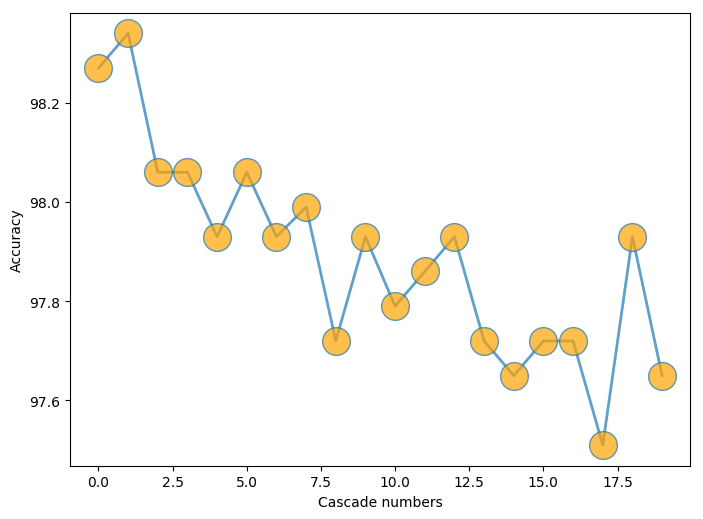

In [16]:
print ("Opt_Cascade_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Cascade numbers')
plt.show()

In [17]:
Accuracy

[98.27,
 98.34,
 98.06,
 98.06,
 97.93,
 98.06,
 97.93,
 97.99,
 97.72,
 97.93,
 97.79,
 97.86,
 97.93,
 97.72,
 97.65,
 97.72,
 97.72,
 97.51,
 97.93,
 97.65]